In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
  
%matplotlib inline 
import plotly_express as px
import matplotlib.pyplot as mp
from sklearn import preprocessing

In [24]:
df = pd.read_csv(r'BODO_3500_14000_ML_covariates_2208.csv')
df = df.rename(columns={'sampling_r': 'period'})
df = df.rename(columns={'cea_name':'CEA'})
df = df.rename(columns={'property_n':'property_name'})
df = df.rename(columns={'core_120_c':'carbon_core_120'})
df = df.rename(columns={'core_carbo':'carbon_core_120'}) # different input for NATR
df = df.rename(columns={'core_carbon_mass':'carbon_core_30'})


df = df.drop(['field_1','property_name','CEA','strata_nam','sampling_round','core_number','actual_lat','actual_lon'], axis = 1)
df.tail()

,carbon_core_120,carbon_core_30,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
384,66.820412,34.238155,46.02749,68.61643,5.40636,6.45001,3369580.50,6123611.0,7236825,6410937.5,...,10880726.0,3.37569,15.89302,70.75943,1.91992,0.18850,0.06643,0.2202,0.0791,3.27718
385,123.539006,47.754463,50.89877,56.12559,6.78138,7.49922,3371630.75,6125522.5,7238085,6411208.5,...,6164271.5,4.56141,11.27141,53.14079,1.50609,0.12940,0.07214,0.2162,0.0926,9.11843
386,91.887217,54.389690,43.65667,63.37782,5.64795,6.16976,3369505.25,6123590.5,7236865,6411027.0,...,11270256.0,0.54177,13.13902,57.63135,1.49062,0.14357,0.06741,0.2067,0.0823,3.59696
387,97.510458,44.966746,44.74040,50.21032,3.19688,9.53379,3371033.00,6124467.0,7236855,6410133.5,...,8659736.0,5.95592,12.81248,72.81287,2.66280,0.11266,0.07973,0.2474,0.1032,10.38832
388,67.642772,40.017460,43.94597,66.10999,4.36458,6.41294,3369553.25,6123584.0,7236805,6410930.0,...,10319304.0,3.21989,16.05201,71.18060,1.92525,0.13636,0.06624,0.2380,0.0806,3.23727


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carbon_core_120  389 non-null    float64
 1   carbon_core_30   389 non-null    float64
 2   topsoil_Cs       389 non-null    float64
 3   subsoil_Cs       389 non-null    float64
 4   slope_pc         389 non-null    float64
 5   s_twi            389 non-null    float64
 6   ogc_6            389 non-null    float64
 7   ogc_5            389 non-null    float64
 8   ogc_4            389 non-null    int64  
 9   ogc_3            389 non-null    float64
 10  ogc_2            389 non-null    float64
 11  ogc_1            389 non-null    float64
 12  ndvi_stabl       389 non-null    float64
 13  mrvbf            389 non-null    float64
 14  gamma_th         389 non-null    float64
 15  gamma_tds        389 non-null    float64
 16  gamma_k          389 non-null    float64
 17  clay_idx        

In [26]:
# get the columns we want
cols_to_norm_df = df.drop('carbon_core_120', axis = 1)
# convert to array
# transform all the data
df_array = np.array(cols_to_norm_df)
df_array

array([[44.37027573, 36.03293   , 32.0545    , ...,  0.1898    ,
         0.0794    ,  4.51403   ],
       [41.05263709, 36.69437   , 28.51077   , ...,  0.2038    ,
         0.0802    ,  2.45615   ],
       [47.68156293, 33.11657   , 31.95604   , ...,  0.1751    ,
         0.0795    , 18.27759   ],
       ...,
       [54.38969015, 43.65667   , 63.37782   , ...,  0.2067    ,
         0.0823    ,  3.59696   ],
       [44.96674632, 44.7404    , 50.21032   , ...,  0.2474    ,
         0.1032    , 10.38832   ],
       [40.01745995, 43.94597   , 66.10999   , ...,  0.238     ,
         0.0806    ,  3.23727   ]])

In [27]:
# Transform the data
# get the columns we want
cols_to_norm_df = df.drop('carbon_core_120', axis = 1)
# convert to array
# transform all the data
df_array = np.array(cols_to_norm_df)
df_array

target_df = df['carbon_core_120'].reset_index()

d = preprocessing.normalize(df_array, axis = 0)
scaled_df = pd.DataFrame(d , columns = cols_to_norm_df.columns).reset_index()
scaled_df
# merge with only column 1 of df
transformed_df = target_df.merge(scaled_df, on = 'index', how = 'left').drop('index', axis = 1)
transformed_df

,carbon_core_120,carbon_core_30,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
0,83.495461,0.043433,0.036058,0.035563,0.061550,0.042102,0.050721,0.050707,0.050701,0.050695,...,0.053479,0.029303,0.057161,0.063838,0.073991,0.053908,0.050208,0.051732,0.050237,0.010459
1,66.072313,0.040185,0.036720,0.031631,0.093115,0.037581,0.050758,0.050731,0.050719,0.050707,...,0.046729,0.020256,0.072552,0.072113,0.070298,0.050807,0.050368,0.055548,0.050743,0.005691
2,99.682242,0.046674,0.033139,0.035453,0.050620,0.054260,0.050760,0.050731,0.050718,0.050705,...,0.045715,0.050958,0.074244,0.073923,0.071623,0.064285,0.048712,0.047725,0.050300,0.042351
3,41.952111,0.031821,0.040825,0.029984,0.080129,0.038942,0.050739,0.050719,0.050710,0.050701,...,0.044682,0.017347,0.078763,0.074388,0.070895,0.045836,0.063106,0.062961,0.063587,0.005956
4,55.243882,0.041232,0.031733,0.028004,0.051432,0.041773,0.050757,0.050731,0.050719,0.050708,...,0.063230,0.020238,0.072270,0.071731,0.070132,0.066546,0.043183,0.042601,0.040620,0.004630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,66.820412,0.033515,0.046059,0.076126,0.059755,0.039667,0.050632,0.050667,0.050683,0.050699,...,0.061802,0.037651,0.043666,0.046151,0.051103,0.059114,0.053152,0.060018,0.050047,0.007593
385,123.539006,0.046746,0.050934,0.062268,0.074953,0.046119,0.050663,0.050683,0.050692,0.050701,...,0.035013,0.050876,0.030968,0.034660,0.040088,0.040580,0.057721,0.058927,0.058588,0.021128
386,91.887217,0.053241,0.043687,0.070314,0.062426,0.037943,0.050631,0.050667,0.050684,0.050700,...,0.064014,0.006043,0.036099,0.037588,0.039676,0.045024,0.053937,0.056338,0.052071,0.008334
387,97.510458,0.044017,0.044771,0.055705,0.035334,0.058632,0.050654,0.050674,0.050683,0.050692,...,0.049187,0.066429,0.035202,0.047490,0.070876,0.035330,0.063794,0.067431,0.065295,0.024071


In [28]:
df.columns

Index(['carbon_core_120', 'carbon_core_30', 'topsoil_Cs', 'subsoil_Cs',
       'slope_pc', 's_twi', 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2',
       'ogc_1', 'ndvi_stabl', 'mrvbf', 'gamma_th', 'gamma_tds', 'gamma_k',
       'clay_idx', 'bi', 'band_12', 'band_04', 'v_depth'],
      dtype='object')

In [29]:
df

,carbon_core_120,carbon_core_30,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
0,83.495461,44.370276,36.03293,32.05450,5.56868,6.84590,3375476.50,6128493.0,7239385,6410489.5,...,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403
1,66.072313,41.052637,36.69437,28.51077,8.42459,6.11087,3377924.25,6131373.0,7241925,6412009.5,...,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615
2,99.682242,47.681563,33.11657,31.95604,4.57981,8.82289,3378076.75,6131357.0,7241745,6411713.5,...,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759
3,41.952111,32.507482,40.79656,27.02616,7.24964,6.33211,3376703.50,6129888.5,7240575,6411155.0,...,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038
4,55.243882,42.122259,31.71140,25.24116,4.65329,6.79252,3377923.25,6131401.0,7241975,6412067.5,...,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,66.820412,34.238155,46.02749,68.61643,5.40636,6.45001,3369580.50,6123611.0,7236825,6410937.5,...,10880726.0,3.37569,15.89302,70.75943,1.91992,0.18850,0.06643,0.2202,0.0791,3.27718
385,123.539006,47.754463,50.89877,56.12559,6.78138,7.49922,3371630.75,6125522.5,7238085,6411208.5,...,6164271.5,4.56141,11.27141,53.14079,1.50609,0.12940,0.07214,0.2162,0.0926,9.11843
386,91.887217,54.389690,43.65667,63.37782,5.64795,6.16976,3369505.25,6123590.5,7236865,6411027.0,...,11270256.0,0.54177,13.13902,57.63135,1.49062,0.14357,0.06741,0.2067,0.0823,3.59696
387,97.510458,44.966746,44.74040,50.21032,3.19688,9.53379,3371033.00,6124467.0,7236855,6410133.5,...,8659736.0,5.95592,12.81248,72.81287,2.66280,0.11266,0.07973,0.2474,0.1032,10.38832


In [30]:
df

,carbon_core_120,carbon_core_30,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
0,83.495461,44.370276,36.03293,32.05450,5.56868,6.84590,3375476.50,6128493.0,7239385,6410489.5,...,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403
1,66.072313,41.052637,36.69437,28.51077,8.42459,6.11087,3377924.25,6131373.0,7241925,6412009.5,...,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615
2,99.682242,47.681563,33.11657,31.95604,4.57981,8.82289,3378076.75,6131357.0,7241745,6411713.5,...,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759
3,41.952111,32.507482,40.79656,27.02616,7.24964,6.33211,3376703.50,6129888.5,7240575,6411155.0,...,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038
4,55.243882,42.122259,31.71140,25.24116,4.65329,6.79252,3377923.25,6131401.0,7241975,6412067.5,...,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,66.820412,34.238155,46.02749,68.61643,5.40636,6.45001,3369580.50,6123611.0,7236825,6410937.5,...,10880726.0,3.37569,15.89302,70.75943,1.91992,0.18850,0.06643,0.2202,0.0791,3.27718
385,123.539006,47.754463,50.89877,56.12559,6.78138,7.49922,3371630.75,6125522.5,7238085,6411208.5,...,6164271.5,4.56141,11.27141,53.14079,1.50609,0.12940,0.07214,0.2162,0.0926,9.11843
386,91.887217,54.389690,43.65667,63.37782,5.64795,6.16976,3369505.25,6123590.5,7236865,6411027.0,...,11270256.0,0.54177,13.13902,57.63135,1.49062,0.14357,0.06741,0.2067,0.0823,3.59696
387,97.510458,44.966746,44.74040,50.21032,3.19688,9.53379,3371033.00,6124467.0,7236855,6410133.5,...,8659736.0,5.95592,12.81248,72.81287,2.66280,0.11266,0.07973,0.2474,0.1032,10.38832


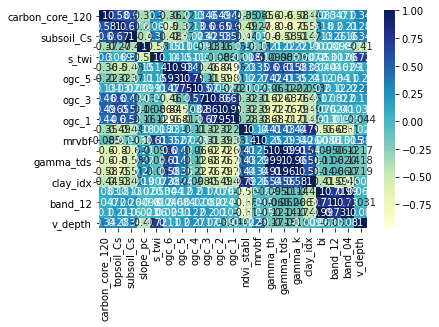

,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,ogc_2,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
0,83.495461,36.03293,32.05450,5.56868,6.84590,3375476.50,6128493.0,7239385,6410489.5,3863908.50,...,9415459.0,2.62721,20.80505,97.87849,2.77983,0.17190,0.06275,0.1898,0.0794,4.51403
1,66.072313,36.69437,28.51077,8.42459,6.11087,3377924.25,6131373.0,7241925,6412009.5,3864000.75,...,8227138.0,1.81609,26.40673,110.56564,2.64108,0.16201,0.06295,0.2038,0.0802,2.45615
2,99.682242,33.11657,31.95604,4.57981,8.82289,3378076.75,6131357.0,7241745,6411713.5,3863668.25,...,8048531.0,4.56878,27.02259,113.34035,2.69087,0.20499,0.06088,0.1751,0.0795,18.27759
3,41.952111,40.79656,27.02616,7.24964,6.33211,3376703.50,6129888.5,7240575,6411155.0,3863871.50,...,7866613.0,1.55527,28.66734,114.05368,2.66351,0.14616,0.07887,0.2310,0.1005,2.57038
4,55.243882,31.71140,25.24116,4.65329,6.79252,3377923.25,6131401.0,7241975,6412067.5,3864051.75,...,11132256.0,1.81448,26.30400,109.98004,2.63484,0.21220,0.05397,0.1563,0.0642,1.99834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,66.820412,46.02749,68.61643,5.40636,6.45001,3369580.50,6123611.0,7236825,6410937.5,3867244.50,...,10880726.0,3.37569,15.89302,70.75943,1.91992,0.18850,0.06643,0.2202,0.0791,3.27718
385,123.539006,50.89877,56.12559,6.78138,7.49922,3371630.75,6125522.5,7238085,6411208.5,3866454.25,...,6164271.5,4.56141,11.27141,53.14079,1.50609,0.12940,0.07214,0.2162,0.0926,9.11843
386,91.887217,43.65667,63.37782,5.64795,6.16976,3369505.25,6123590.5,7236865,6411027.0,3867359.75,...,11270256.0,0.54177,13.13902,57.63135,1.49062,0.14357,0.06741,0.2067,0.0823,3.59696
387,97.510458,44.74040,50.21032,3.19688,9.53379,3371033.00,6124467.0,7236855,6410133.5,3865822.00,...,8659736.0,5.95592,12.81248,72.81287,2.66280,0.11266,0.07973,0.2474,0.1032,10.38832


In [31]:
# try the heatmap with transformed data
heatmap_df = df.drop(['carbon_core_30'], axis = 1) #', 'gamma_tds', 'gamma_k','band_12','mrvbf',], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
dataplot = sns.heatmap(heatmap_df.corr(), cmap="YlGnBu", annot=True)
# # displaying heatmap
mp.show()

# based on heatmap, now choose highly correlated variables
correlated_df = df.drop( ['carbon_core_30'], axis = 1)#, 'ogc_6', 'ogc_5', 'ogc_4', 'ogc_3', 'ogc_2', 'ogc_1','clay_idx','v_depth'], axis = 1)
correlated_df


In [32]:
correlated_df.describe()

,carbon_core_120,topsoil_Cs,subsoil_Cs,slope_pc,s_twi,ogc_6,ogc_5,ogc_4,ogc_3,ogc_2,...,ndvi_stabl,mrvbf,gamma_th,gamma_tds,gamma_k,clay_idx,bi,band_12,band_04,v_depth
count,389.000000,389.000000,389.000000,389.000000,389.000000,3.890000e+02,3.890000e+02,3.890000e+02,3.890000e+02,3.890000e+02,...,3.890000e+02,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,101.816771,47.956638,41.942666,4.174899,8.131729,3.374230e+06,6.127840e+06,7.239500e+06,6.411343e+06,3.865271e+06,...,8.646912e+06,4.124041,14.959894,64.196806,1.557444,0.154044,0.062276,0.183244,0.078570,15.358081
std,42.369004,16.371116,18.171380,1.903266,1.359968,2.703721e+03,2.096806e+03,1.466926e+03,1.679457e+03,2.394598e+03,...,2.219647e+06,1.914753,10.819098,43.895688,1.098181,0.049151,0.011726,0.032071,0.015784,15.606832
min,24.694681,17.790700,10.643030,0.179550,5.699690,3.368684e+06,6.122912e+06,7.236405e+06,6.407427e+06,3.860114e+06,...,4.752180e+06,0.133840,2.056410,12.757310,0.163250,0.026930,0.029840,0.096400,0.033600,1.019650
25%,70.474983,31.783200,25.241160,2.977090,7.046010,3.372082e+06,6.126496e+06,7.238345e+06,6.410372e+06,3.863727e+06,...,6.793668e+06,2.682090,5.891790,23.873820,0.455750,0.117630,0.054160,0.161400,0.067700,4.710300
50%,98.768325,50.867330,42.084570,4.105740,7.905800,3.374286e+06,6.127806e+06,7.239525e+06,6.411428e+06,3.865384e+06,...,8.224461e+06,3.991340,11.851510,53.140790,1.354240,0.147040,0.062750,0.184400,0.079500,9.486850
75%,128.177946,58.505900,55.840190,5.478130,9.059090,3.376189e+06,6.129314e+06,7.240635e+06,6.412334e+06,3.866998e+06,...,1.051730e+07,5.123430,22.318780,97.956310,2.650360,0.192930,0.069690,0.204600,0.088600,19.942100
max,231.715555,125.402730,84.975640,10.037920,12.298240,3.379781e+06,6.132439e+06,7.242855e+06,6.415414e+06,3.870393e+06,...,1.583669e+07,8.913330,44.017980,170.858430,3.734830,0.283380,0.105530,0.271400,0.132400,72.150700


array([[<AxesSubplot:title={'center':'carbon_core_120'}>,
        <AxesSubplot:title={'center':'topsoil_Cs'}>,
        <AxesSubplot:title={'center':'subsoil_Cs'}>,
        <AxesSubplot:title={'center':'slope_pc'}>,
        <AxesSubplot:title={'center':'s_twi'}>],
       [<AxesSubplot:title={'center':'ogc_6'}>,
        <AxesSubplot:title={'center':'ogc_5'}>,
        <AxesSubplot:title={'center':'ogc_4'}>,
        <AxesSubplot:title={'center':'ogc_3'}>,
        <AxesSubplot:title={'center':'ogc_2'}>],
       [<AxesSubplot:title={'center':'ogc_1'}>,
        <AxesSubplot:title={'center':'ndvi_stabl'}>,
        <AxesSubplot:title={'center':'mrvbf'}>,
        <AxesSubplot:title={'center':'gamma_th'}>,
        <AxesSubplot:title={'center':'gamma_tds'}>],
       [<AxesSubplot:title={'center':'gamma_k'}>,
        <AxesSubplot:title={'center':'clay_idx'}>,
        <AxesSubplot:title={'center':'bi'}>,
        <AxesSubplot:title={'center':'band_12'}>,
        <AxesSubplot:title={'center':'band_04'

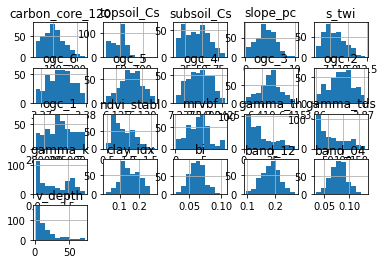

In [33]:
Core_SOC_df = correlated_df
Core_SOC_df.hist()

In [34]:
# Investigating drivers of Core_SOC

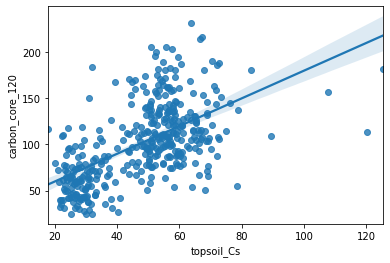

In [35]:
g = sns.regplot(x ='topsoil_Cs', y =  'carbon_core_120', data = Core_SOC_df)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carbon_core_120  389 non-null    float64
 1   carbon_core_30   389 non-null    float64
 2   topsoil_Cs       389 non-null    float64
 3   subsoil_Cs       389 non-null    float64
 4   slope_pc         389 non-null    float64
 5   s_twi            389 non-null    float64
 6   ogc_6            389 non-null    float64
 7   ogc_5            389 non-null    float64
 8   ogc_4            389 non-null    int64  
 9   ogc_3            389 non-null    float64
 10  ogc_2            389 non-null    float64
 11  ogc_1            389 non-null    float64
 12  ndvi_stabl       389 non-null    float64
 13  mrvbf            389 non-null    float64
 14  gamma_th         389 non-null    float64
 15  gamma_tds        389 non-null    float64
 16  gamma_k          389 non-null    float64
 17  clay_idx        

In [37]:
from pycaret.regression import *

exp_reg = setup(df
,target='carbon_core_120'
,normalize = False 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='Prop-30-120_ML'
,ignore_features = ['carbon_core_30']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(389, 22)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(272, 5)"


In [38]:
compare_models()
# MORO first run  = R2 = 0.3685
# Normalise = true  R2 from 0.37 to 0.422
# Transf targ = tru R2 from 0.422 to 0.4199
# transformation tru R2 froom 0.4199 to 0.4478
# Trans targe = Fa R2 from 0.4478 to 0.4557
# Feat interaction R2 from 0.4557 to 0.4671
# ignore features - all except top 2 R2 down to 0.29
# ignore features - all except top 5 R2 up to 0.42 - better to have all features
# turn off ign feat - R2 back to 0.4671
# PCA = True         R2 = 0.4671 - no difference
# feat select thres 0.05 R2 = 0.21 - down don't use this.
# feat select thres 0.80 R2 = 0.37 - increase 
# PCA = Fal		 R2 = 0.38
# feat selec        0.50 R2 = 0.46
# Remove Multicol = Fa 	 R2 = 0.276 - decrease - don't use
# df = ALL the covariates
# MORO 120 cm = train = 0.47
# MORO 30 cm = train = 0.51
# BODO 30 cm = train = 0.21

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,25.4467,1066.2503,32.5466,0.3337,0.3588,0.3185,0.0150
lasso,Lasso Regression,25.4576,1068.7246,32.5897,0.3328,0.3590,0.3195,0.0060
ridge,Ridge Regression,25.4127,1066.7334,32.5574,0.3319,0.3583,0.3167,0.0050
lr,Linear Regression,25.4093,1066.9782,32.5616,0.3315,0.3583,0.3164,0.3780
lar,Least Angle Regression,25.4093,1066.9782,32.5616,0.3315,0.3583,0.3164,0.0060
huber,Huber Regressor,25.1247,1076.9382,32.7069,0.3233,0.3538,0.2994,0.0130
en,Elastic Net,26.2830,1111.1397,33.1722,0.3208,0.3724,0.3430,0.0150
gbr,Gradient Boosting Regressor,25.9386,1124.6523,33.2460,0.2940,0.3750,0.3085,0.0230
omp,Orthogonal Matching Pursuit,26.0529,1139.0734,33.6994,0.2870,0.3601,0.3221,0.0050
ada,AdaBoost Regressor,26.8713,1152.6945,33.7715,0.2837,0.3612,0.3355,0.0230


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [39]:
model = create_model('br') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,27.0822,1137.7684,33.7308,0.3211,0.3581,0.3371
1,22.7637,994.4984,31.5357,0.3636,0.2947,0.2212
2,23.2033,822.0593,28.6716,0.3164,0.2971,0.2631
3,27.6197,1335.2232,36.5407,0.3721,0.3622,0.3249
4,26.3603,1267.7022,35.6048,0.4588,0.4089,0.3639
5,23.8169,895.9484,29.9324,0.3622,0.3168,0.2913
6,28.3551,1176.1510,34.2951,-0.0848,0.4705,0.4073
7,24.5308,816.6702,28.5774,0.6120,0.3318,0.3276
8,24.8439,1086.1843,32.9573,0.3172,0.3400,0.2859
9,25.8908,1130.2976,33.6199,0.2983,0.4078,0.3625


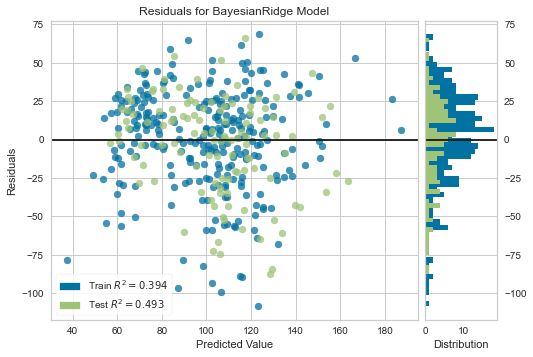

In [42]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
tuned = tuned_model
plot_model(tuned)


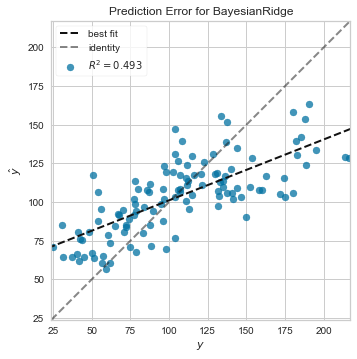

In [43]:
plot_model(tuned, plot = 'error')

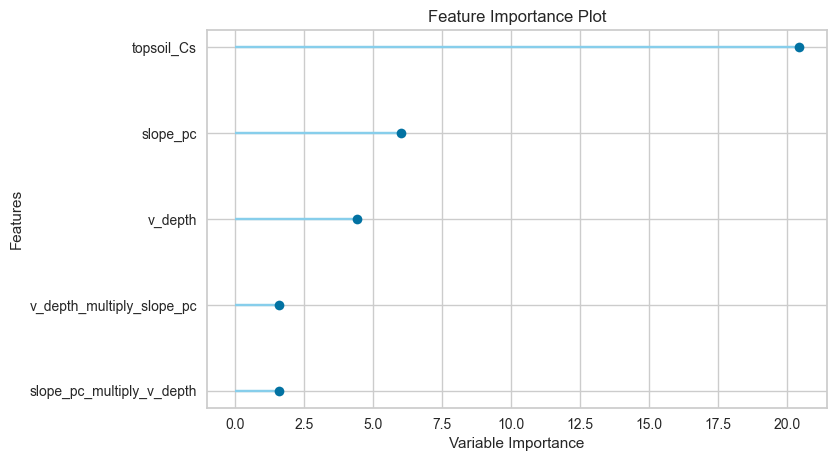

In [44]:
plot_model(tuned, plot = 'feature')

In [46]:
evaluate_model(tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [47]:
from pycaret.regression import *

# setup(SOC_percent_df instead of df3 (Core_SOC as target)
# 	R2 from = 0.4959 to 0.5436
exp_reg = setup(df
,target='carbon_core_120'
,normalize = True 		# this changes r2 from 0.27 to 0.2625 - ie not at all
,session_id=123 
,log_experiment=True
,experiment_name='BODO-30-120_ML'
,ignore_features = ['carbon_core_30']
,feature_interaction = True  	#feature_ratio = True # creation of new features frome existing # r2 from 0.29 to 0.26
,feature_selection = True 	# this changes r2 from 0.27 to 0.29
, feature_selection_threshold = 0.5
, remove_multicollinearity = True
, multicollinearity_threshold = 0.5
#, transform_target = True
 , transformation = True
# , pca = True   			# decrease from 0.29 to 0.1982
)

,Description,Value
0,session_id,123
1,Target,carbon_core_120
2,Original Data,"(389, 22)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(272, 6)"


In [49]:
compare_models()
# MORO first run  = R2 = 0.3685
# Normalise = true  R2 from 0.37 to 0.422
# Transf targ = tru R2 from 0.422 to 0.4199
# transformation tru R2 froom 0.4199 to 0.4478
# Trans targe = Fa R2 from 0.4478 to 0.4557
# Feat interaction R2 from 0.4557 to 0.4671
# ignore features - all except top 2 R2 down to 0.29
# ignore features - all except top 5 R2 up to 0.42 - better to have all features
# turn off ign feat - R2 back to 0.4671
# PCA = True         R2 = 0.4671 - no difference
# feat select thres 0.05 R2 = 0.21 - down don't use this.
# feat select thres 0.80 R2 = 0.37 - increase 
# PCA = Fal		 R2 = 0.38
# feat selec        0.50 R2 = 0.46
# Remove Multicol = Fa 	 R2 = 0.276 - decrease - don't use
# df = ALL the covariates
# MORO 120 cm = train = 0.47
# MORO 30 cm = train = 0.51
# BODO 30 cm = train = 0.21
# BODO 120 cm (Normal = False)= train = 0.33
# BODO 120 cm (Normal = True)= train = 0.37

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,25.9183,1022.7321,31.8406,0.3710,0.3500,0.3313,0.0420
lasso,Lasso Regression,25.6421,1017.2165,31.8135,0.3672,0.3428,0.3136,0.0070
br,Bayesian Ridge,25.6268,1017.9791,31.8182,0.3665,0.3430,0.3131,0.0070
ridge,Ridge Regression,25.5954,1018.0387,31.8242,0.3650,0.3419,0.3111,0.0060
lar,Least Angle Regression,25.5937,1018.2289,31.8278,0.3646,0.3418,0.3109,0.0070
lr,Linear Regression,25.6519,1020.4867,31.8646,0.3632,0.3429,0.3122,0.0610
huber,Huber Regressor,25.4789,1027.7154,31.9799,0.3590,0.3385,0.2992,0.0160
rf,Random Forest Regressor,25.6194,1067.9048,32.4564,0.3482,0.3402,0.3007,0.1090
en,Elastic Net,26.3755,1075.6632,32.6459,0.3444,0.3634,0.3389,0.0180
lightgbm,Light Gradient Boosting Machine,26.0824,1085.7138,32.7597,0.3342,0.3404,0.3019,0.0150


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)

In [ ]:
model = create_model('ada') #, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,25.2969,1068.9142,32.6943,0.3622,0.3386,0.3190
1,24.8508,965.3534,31.0701,0.3823,0.3143,0.2774
2,23.5536,829.5110,28.8012,0.3102,0.3143,0.2796
3,26.4507,1283.0476,35.8197,0.3967,0.3574,0.3261
4,29.2612,1291.5948,35.9388,0.4486,0.4158,0.4013
5,20.9954,690.9983,26.2868,0.5081,0.3018,0.2747
6,25.2509,843.1321,29.0367,0.2223,0.3657,0.3669
7,26.2554,985.2141,31.3881,0.5319,0.3312,0.3248
8,30.6441,1250.1877,35.3580,0.2141,0.3377,0.3312
9,25.4690,1020.9877,31.9529,0.3662,0.4193,0.3837


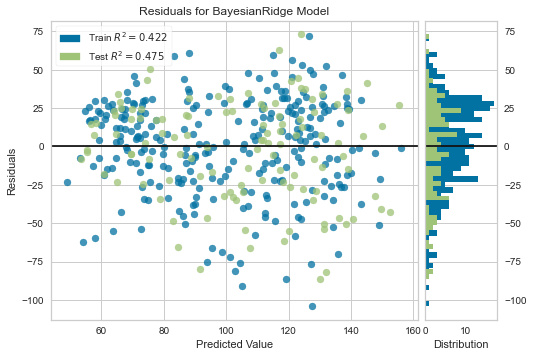

In [50]:
tuned_model= tune_model(model, n_iter=300, optimize = 'R2')
tuned = tuned_model
plot_model(tuned)

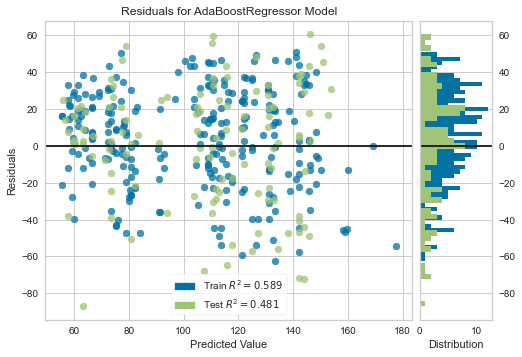

In [ ]:
tuned = tuned_model
plot_model(tuned)
# train BODO - untransformed - 120 = 0.58, test = 0.44
# BODO - transformed - 120 train = 0.44, test = 0.466
# untransformed = train = 0.034, test = 0.427

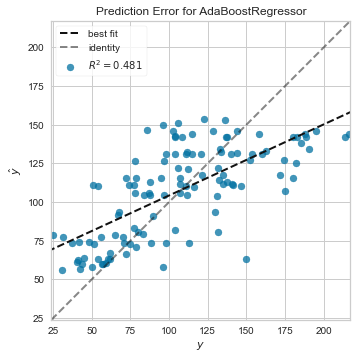

In [ ]:
plot_model(tuned, plot = 'error')

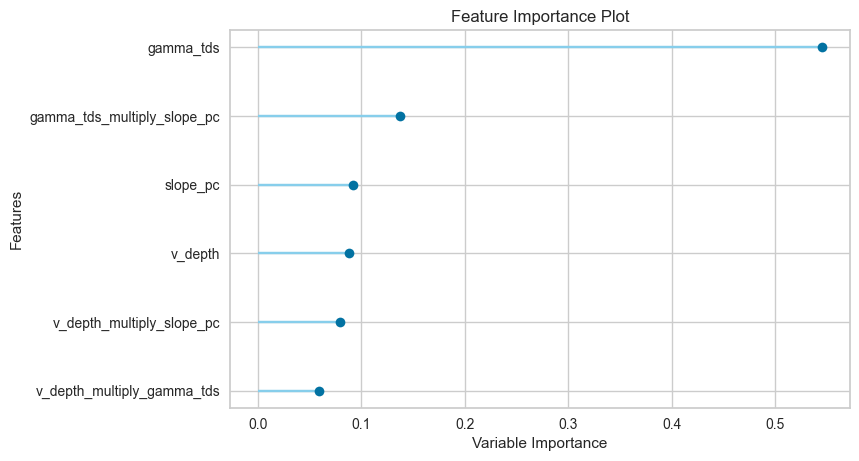

In [ ]:
plot_model(tuned, plot = 'feature')